In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df_brazil = pd.read_excel(r'alldatasets.xlsx',sheet_name='Brazil')

In [64]:
df_brazil.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn_usd
0,BR0,Brazil,180.65,0.0,13.0,1.510429,7.0,8.0,1.0,47.0,4.0,0.882373,3.0,0.0,707.225360
1,BR1,Brazil,180.35,0.0,16.0,0.399053,0.0,5.0,1.0,50.0,3.0,0.306352,3.0,1.0,290.316010
2,BR2,Brazil,164.95,0.0,15.0,0.002132,NaN,5.0,0.0,52.0,3.0,0.533106,3.0,1.0,109.973544
3,BR3,Brazil,182.30,0.0,4.0,-1.823701,NaN,9.0,1.0,49.0,8.0,0.777917,NaN,NaN,0.000000
4,BR4,Brazil,NaN,NaN,NaN,NaN,NaN,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   childid        5914 non-null   object 
 1   country        5914 non-null   object 
 2   height         3607 non-null   float64
 3   stunting_2cat  4742 non-null   float64
 4   EDUYRS2        3635 non-null   float64
 5   z_score        3611 non-null   float64
 6   agegapr1       3469 non-null   float64
 7   momeduyrsr1    5907 non-null   float64
 8   chsexr1        5913 non-null   float64
 9   agemonr1       4747 non-null   float64
 10  hhsizer1       5007 non-null   float64
 11  wi_newr1       4990 non-null   float64
 12  job_cat        3017 non-null   float64
 13  pvt_sector     2766 non-null   float64
 14  earn_usd       3668 non-null   float64
dtypes: float64(13), object(2)
memory usage: 693.2+ KB


In [66]:
df_brazil.describe()

,height,stunting_2cat,EDUYRS2,z_score,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn_usd
count,3607.000000,4742.000000,3635.000000,3.611000e+03,3469.000000,5907.000000,5913.000000,4747.000000,5007.000000,4990.000000,3017.000000,2766.000000,3668.000000
mean,167.711076,0.109447,11.315268,1.218500e-11,4.560392,6.488573,0.513614,43.134401,4.684841,0.503139,2.868744,0.866956,278.431375
std,9.213763,0.312233,4.162320,1.000138e+00,4.103920,4.187285,0.499857,3.685779,2.033709,0.189250,0.494003,0.339684,422.757290
min,138.500000,0.000000,0.000000,-3.570150e+00,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,160.700000,0.000000,8.000000,-6.329400e-01,2.000000,4.000000,0.000000,40.000000,3.000000,0.367876,3.000000,1.000000,93.707360
50%,167.400000,0.000000,11.000000,2.132443e-03,4.000000,5.000000,1.000000,43.000000,4.000000,0.536873,3.000000,1.000000,176.806340
75%,174.600000,0.000000,14.000000,7.165889e-01,6.000000,9.000000,1.000000,46.000000,5.000000,0.603284,3.000000,1.000000,334.296587
max,201.200000,1.000000,22.000000,2.780574e+00,31.000000,22.000000,1.000000,53.000000,61.000000,1.000000,4.000000,1.000000,8840.317000


In [67]:
df_brazil=df_brazil.astype({"chsexr1": 'object', "job_cat": 'object', "pvt_sector": 'object',"stunting_2cat": 'object'})

In [68]:
df_brazil.dtypes

childid           object
country           object
height           float64
stunting_2cat     object
EDUYRS2          float64
z_score          float64
agegapr1         float64
momeduyrsr1      float64
chsexr1           object
agemonr1         float64
hhsizer1         float64
wi_newr1         float64
job_cat           object
pvt_sector        object
earn_usd         float64
dtype: object

In [69]:
df_outlier=df_brazil.copy()

In [70]:
df_outlier.dtypes

childid           object
country           object
height           float64
stunting_2cat     object
EDUYRS2          float64
z_score          float64
agegapr1         float64
momeduyrsr1      float64
chsexr1           object
agemonr1         float64
hhsizer1         float64
wi_newr1         float64
job_cat           object
pvt_sector        object
earn_usd         float64
dtype: object

In [71]:
total = df_outlier.isnull().sum().sort_values(ascending=False)
percent = (df_outlier.isnull().sum()/df_outlier.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 95]

,Total,Missing Percent


In [72]:
df_outlier=df_outlier.select_dtypes(include=['int64','floating'])

In [73]:
df_outlier.dtypes

height         float64
EDUYRS2        float64
z_score        float64
agegapr1       float64
momeduyrsr1    float64
agemonr1       float64
hhsizer1       float64
wi_newr1       float64
earn_usd       float64
dtype: object

In [74]:
import warnings

warnings.filterwarnings('ignore')

In [75]:
df_outlier.dtypes

height         float64
EDUYRS2        float64
z_score        float64
agegapr1       float64
momeduyrsr1    float64
agemonr1       float64
hhsizer1       float64
wi_newr1       float64
earn_usd       float64
dtype: object

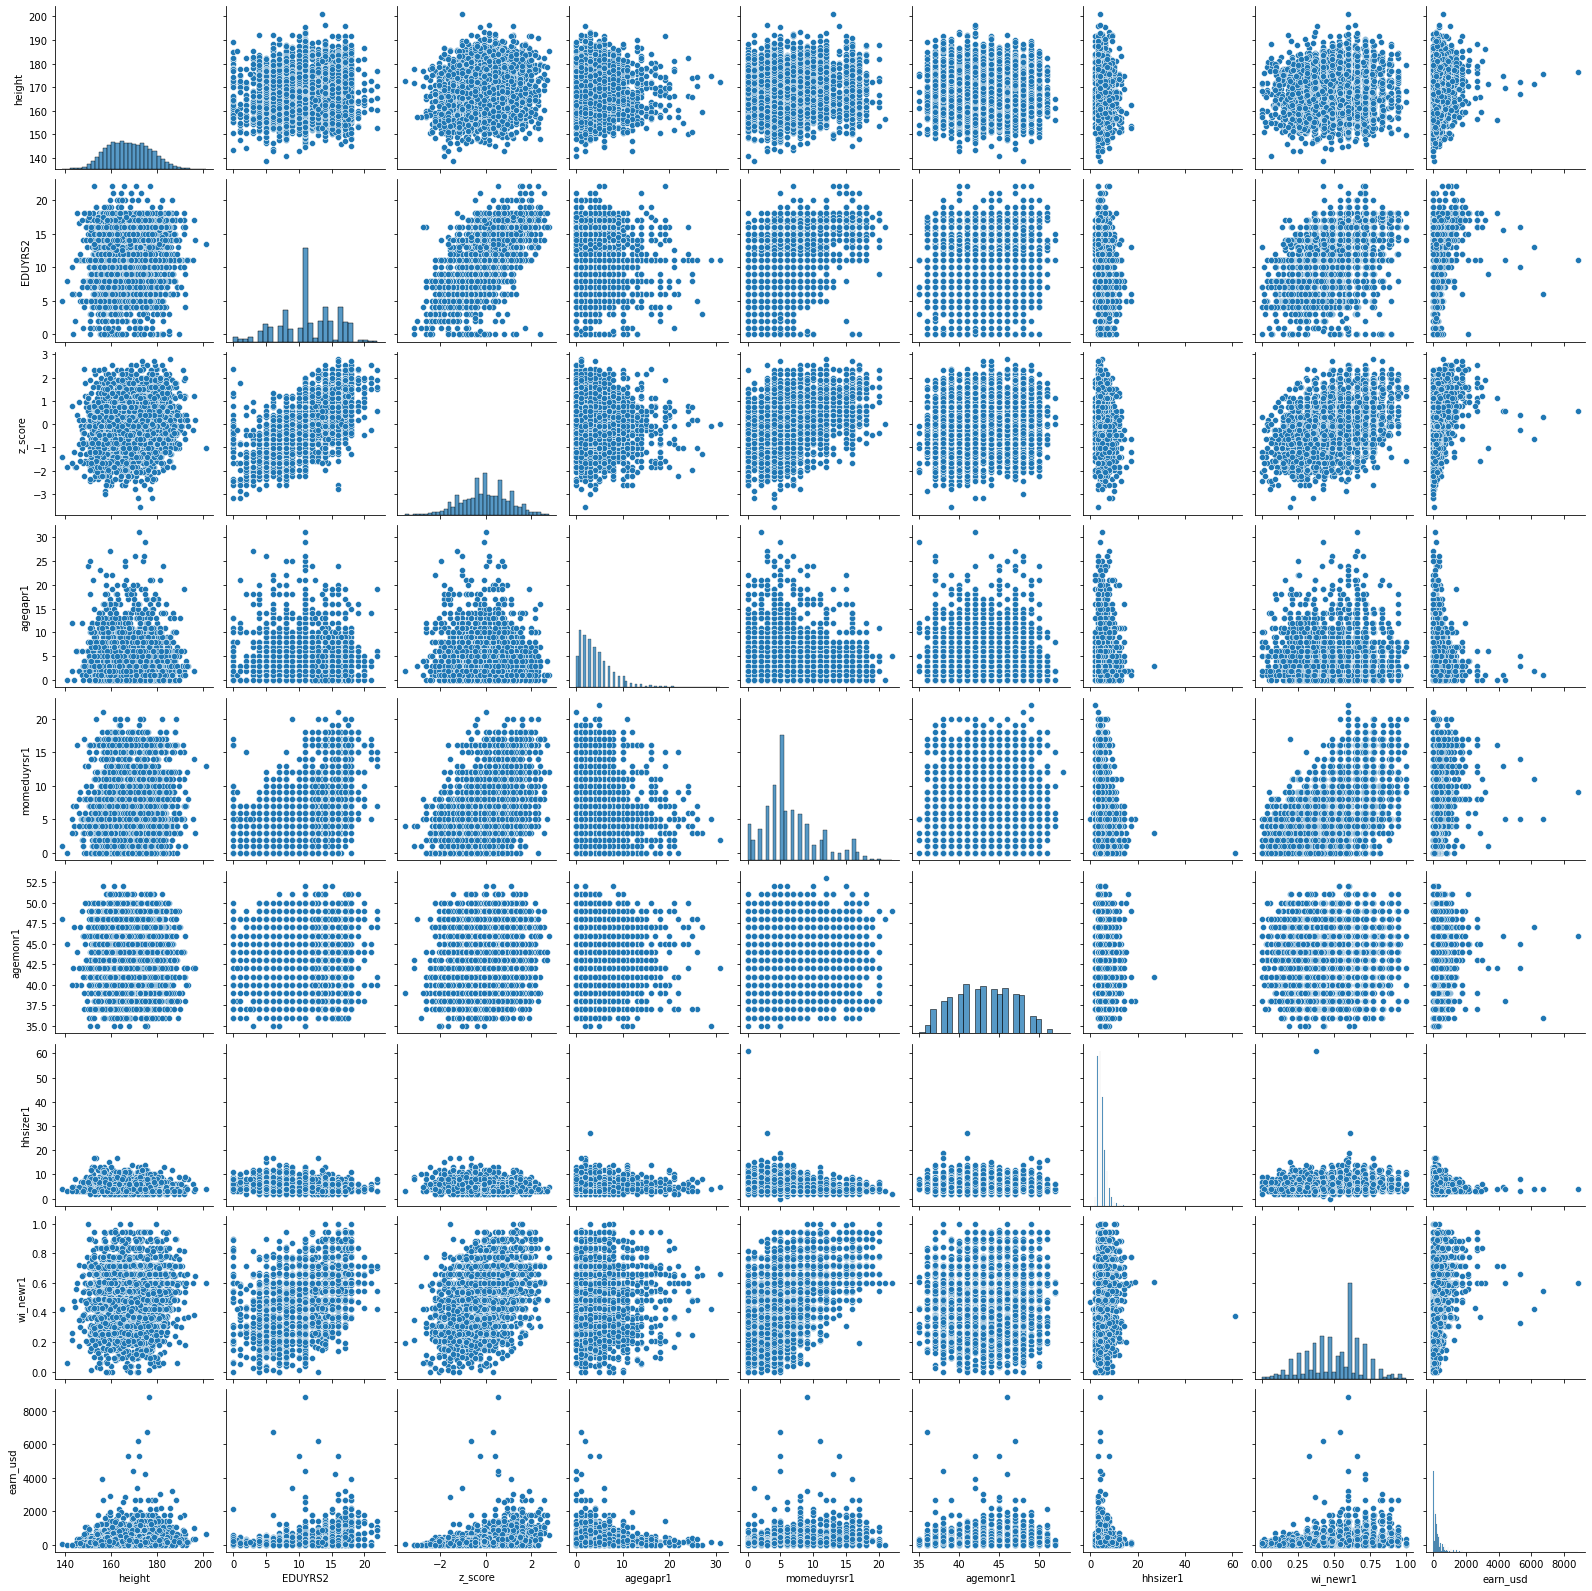

In [76]:
sns.pairplot(df_outlier)

# Outlier Cappping

In [77]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64') | ((df[col].dtype)=='float32')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df



In [78]:
final_df=cap_data(df_outlier)

capping the  height
capping the  EDUYRS2
capping the  z_score
capping the  agegapr1
capping the  momeduyrsr1
capping the  agemonr1
capping the  hhsizer1
capping the  wi_newr1
capping the  earn_usd


In [79]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [80]:
df_brazil=df_brazil.drop(['childid','country'],axis=1)

In [81]:
all_category_features=df_brazil.select_dtypes(include='object')

In [82]:
all_category_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stunting_2cat  4742 non-null   object
 1   chsexr1        5913 non-null   object
 2   job_cat        3017 non-null   object
 3   pvt_sector     2766 non-null   object
dtypes: object(4)
memory usage: 184.9+ KB


# KNN for Categories

In [83]:
mm = MinMaxScaler()

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()
    #Encoding dict &amp; Removing nan    
    #mappin = dict()
    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    #Apply mapping
    for variable in cols:
        integer_encode(df, variable, mappin[variable])  

    #Minmaxscaler and KNN imputation 
    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in df.columns : 
        df[i] = round(df[i]).astype('int')

    #Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df

In [84]:
df_cat_imp=imputation(all_category_features,['stunting_2cat','chsexr1','job_cat','pvt_sector'])

In [85]:
df_cat_imp.isnull().sum().sort_values(ascending = False)

pvt_sector       0
job_cat          0
chsexr1          0
stunting_2cat    0
dtype: int64

In [86]:
df_cat_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stunting_2cat  5914 non-null   float64
 1   chsexr1        5914 non-null   float64
 2   job_cat        5914 non-null   float64
 3   pvt_sector     5914 non-null   float64
dtypes: float64(4)
memory usage: 184.9 KB


In [87]:
#df_cat_imp.to_csv(r'C:\Users\rramr\OneDrive\Desktop\Modern Scientist Global\Peru\df_knn_before.csv', encoding='utf-8', index=True)

In [88]:
#all_category_features=df_et.select_dtypes(include='o')

In [89]:
#cat_dummies = pd.get_dummies(all_category_features, dummy_na=True)
#cat_dummies.head()

# KNN for numerics

In [90]:
df_knn=final_df.copy()

In [91]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_num_imp = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)

In [92]:
df_num_imp.head()

,height,EDUYRS2,z_score,agegapr1,momeduyrsr1,agemonr1,hhsizer1,wi_newr1,earn_usd
0,180.65,13.0,1.510429,7.0,8.0,47.0,4.0,0.882373,707.225360
1,180.35,16.0,0.399053,0.0,5.0,50.0,3.0,0.306352,290.316010
2,164.95,15.0,0.002132,3.2,5.0,50.0,3.0,0.533106,109.973544
3,182.30,4.0,-1.823701,5.0,9.0,49.0,8.0,0.777917,0.000000
4,177.45,16.0,1.081756,6.2,15.0,45.6,3.6,0.677364,432.998727


In [93]:
df_outlier_concat = pd.concat([df_num_imp, df_cat_imp], axis=1)
df_outlier_concat.head()

,height,EDUYRS2,z_score,agegapr1,momeduyrsr1,agemonr1,hhsizer1,wi_newr1,earn_usd,stunting_2cat,chsexr1,job_cat,pvt_sector
0,180.65,13.0,1.510429,7.0,8.0,47.0,4.0,0.882373,707.225360,0.0,1.0,3.0,0.0
1,180.35,16.0,0.399053,0.0,5.0,50.0,3.0,0.306352,290.316010,0.0,1.0,3.0,1.0
2,164.95,15.0,0.002132,3.2,5.0,50.0,3.0,0.533106,109.973544,0.0,0.0,3.0,1.0
3,182.30,4.0,-1.823701,5.0,9.0,49.0,8.0,0.777917,0.000000,0.0,1.0,2.0,1.0
4,177.45,16.0,1.081756,6.2,15.0,45.6,3.6,0.677364,432.998727,0.0,1.0,3.0,1.0


In [94]:
df_outlier_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   height         5914 non-null   float64
 1   EDUYRS2        5914 non-null   float64
 2   z_score        5914 non-null   float64
 3   agegapr1       5914 non-null   float64
 4   momeduyrsr1    5914 non-null   float64
 5   agemonr1       5914 non-null   float64
 6   hhsizer1       5914 non-null   float64
 7   wi_newr1       5914 non-null   float64
 8   earn_usd       5914 non-null   float64
 9   stunting_2cat  5914 non-null   float64
 10  chsexr1        5914 non-null   float64
 11  job_cat        5914 non-null   float64
 12  pvt_sector     5914 non-null   float64
dtypes: float64(13)
memory usage: 600.8 KB


In [95]:
df_outlier_concat=df_outlier_concat.astype({"stunting_2cat": 'int64'})

In [96]:
df_outlier_concat.head()

,height,EDUYRS2,z_score,agegapr1,momeduyrsr1,agemonr1,hhsizer1,wi_newr1,earn_usd,stunting_2cat,chsexr1,job_cat,pvt_sector
0,180.65,13.0,1.510429,7.0,8.0,47.0,4.0,0.882373,707.225360,0,1.0,3.0,0.0
1,180.35,16.0,0.399053,0.0,5.0,50.0,3.0,0.306352,290.316010,0,1.0,3.0,1.0
2,164.95,15.0,0.002132,3.2,5.0,50.0,3.0,0.533106,109.973544,0,0.0,3.0,1.0
3,182.30,4.0,-1.823701,5.0,9.0,49.0,8.0,0.777917,0.000000,0,1.0,2.0,1.0
4,177.45,16.0,1.081756,6.2,15.0,45.6,3.6,0.677364,432.998727,0,1.0,3.0,1.0


In [97]:
df_knn_imp=df_outlier_concat.copy()

# Outcome variable distribution

<AxesSubplot:xlabel='z_score', ylabel='Density'>

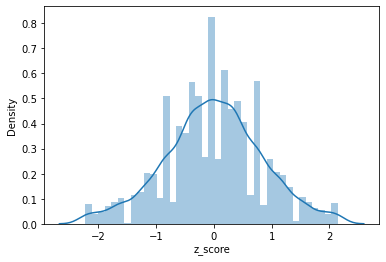

In [98]:
sns.distplot(df_knn_imp['z_score'])

In [99]:
Y = df_knn_imp['z_score']
X = df_knn_imp[['stunting_2cat']]

# Train Test Split

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

# Creating and Training the Model

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lm = LinearRegression()

In [103]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
results = lm.fit(X_train,Y_train)
results


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [-0.54708171]


In [106]:
predictions = lm.predict(X_test)

## Evaluating the Model

In [107]:
from sklearn import metrics

In [108]:
print('MSE: ',metrics.mean_squared_error(Y_test,predictions))

MSE:  0.6762394449001927


In [109]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

RMSE:  0.8223377924552615


### Residual Histogram

<AxesSubplot:xlabel='z_score', ylabel='Density'>

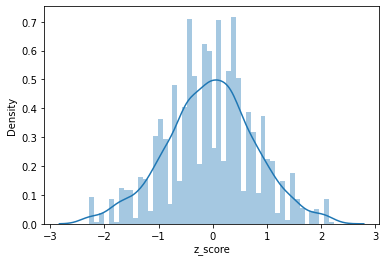

In [110]:
sns.distplot((Y_test-predictions),bins=50)

### Conclusion

In [111]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
stunting_2cat,-0.547082


In [112]:
print ('Score:', results.score(X_test, Y_test))

Score: 0.023344522523836564


# Standard Machine Learning Models Comparison

In [113]:
import random
import scipy
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scikitplot as skplt
import sklearn
from sklearn import preprocessing
from sklearn import datasets 
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct,WhiteKernel,RBF,Matern,RationalQuadratic,ExpSineSquared,ConstantKernel,PairwiseKernel
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.decomposition import PCA
from sklearn.model_selection import *
from sklearn.metrics import *

# Plot RMSE,MAE and R2

In [114]:
def plot_all(X_train, y_train, X_test, y_test, all_regrs, regr_names):
    plt.figure(figsize=(27,8))
#     plt.suptitle("Dataset: %s"%file_name, size=16)
    ax1 = plt.subplot(131)
    rmse_scores = plot_rmse_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax1)
    ax2 = plt.subplot(132)
    ax2.set_xlim(0,1)
    r2_scores = plot_r2_score(X_train, y_train, X_test, y_test, all_regrs, regr_names,ax2)
    ax3 = plt.subplot(133)    
    mae_scores = plot_mae_score(X_train, y_train, X_test, y_test, all_regrs, regr_names,ax3)
    
#     plt.savefig(IMAGE_PATH+file.split('.')[0]+'_rmse-r2')
    plt.show()
    return rmse_scores,r2_scores,mae_scores
        
def plot_rmse_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax):
    rmse_scores = dict()
    training_scores = []
    test_scores = []
    
    for regr, regr_name in zip(all_regrs, regr_names):  #rrmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        train_preds = regr.predict(X_train)
        test_preds = regr.predict(X_test)
        train_score =  np.sqrt(np.mean((train_preds - y_train) ** 2)) #sklearn.metrics.mean_squared_error(y_train, train_preds)
        test_score =   np.sqrt(np.mean((test_preds - y_test) ** 2)) #sklearn.metrics.mean_squared_error(y_test, test_preds)
        training_scores.append(train_score)
        test_scores.append(test_score)
        rmse_scores[regr_name] = test_score
        
    N = len(all_regrs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.barh(ind-width/2, training_scores, align='center', label='Training Set', height=width)
    p2 = plt.barh(ind+width/2, test_scores, align='center', label='Test Set', height=width)
    for i, v in enumerate(training_scores):
        plt.text(v,ind[i]-width/2.5,'%.3f'%v)
        plt.text(test_scores[i],ind[i]+width/1.5,'%.3f'%test_scores[i])
        
    plt.yticks(ind, regr_names) 
    plt.xlabel('rmse')
    plt.title('Root Mean Squared Error Of All Regressors')
    plt.legend(handles=[p1,p2])
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
#     ax.yaxis.tick_right()
    return rmse_scores

def plot_r2_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax):
    r2_scores = dict()
    training_scores = []
    test_scores = []
    
    for regr, regr_name in zip(all_regrs, regr_names):
        train_preds = regr.predict(X_train)
        test_preds = regr.predict(X_test)
        train_score = sklearn.metrics.r2_score(y_train, train_preds)
        test_score = sklearn.metrics.r2_score(y_test, test_preds)
        training_scores.append(train_score)
        test_scores.append(test_score)
        r2_scores[regr_name] = test_score
        
    N = len(all_regrs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

#     p1 = plt.bar(ind, training_scores, width)
#     p2 = plt.bar(ind+width, test_scores, width)
#     plt.ylabel('Scores')
#     plt.title('Scores by group and gender')
#     plt.xticks(ind, regr_names,rotation='vertical')
#     plt.yticks(np.arange(0, 1.1, 0.1))
#     plt.legend((p1[0], p2[0]), ('Training', 'Test'))

    p1 = plt.barh(ind-width/2, training_scores, align='center', label='Training Set', height=width)
    p2 = plt.barh(ind+width/2, test_scores, align='center', label='Test Set', height=width)
    for i, v in enumerate(training_scores):
        plt.text(v+0.01,ind[i]-width/2.5,'%.3f'%v)
        plt.text(max(test_scores[i],0)+0.01,ind[i]+width/1.5,'%.3f'%test_scores[i])

    plt.yticks(ind, regr_names)
    plt.xlabel('R² Score')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title('R² Scores Of All regressors')
    plt.legend(handles=[p1,p2])
    plt.gca().invert_yaxis()
#     plt.gca().invert_xaxis()
    ax.yaxis.tick_right()
    return r2_scores

def plot_mae_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax):
    mae_scores = dict()
    training_scores = []
    test_scores = []
    
    for regr, regr_name in zip(all_regrs, regr_names):
        train_preds = regr.predict(X_train)
        test_preds = regr.predict(X_test)
        train_score = sklearn.metrics.mean_absolute_error(y_train, train_preds)
        test_score = sklearn.metrics.mean_absolute_error(y_test, test_preds)
        training_scores.append(train_score)
        test_scores.append(test_score)
        mae_scores[regr_name] = test_score
        
    N = len(all_regrs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.barh(ind-width/2, training_scores, align='center', label='Training Set', height=width)
    p2 = plt.barh(ind+width/2, test_scores, align='center', label='Test Set', height=width)
    for i, v in enumerate(training_scores):
        plt.text(v,ind[i]-width/2.5,'%.3f'%v)
        plt.text(test_scores[i],ind[i]+width/1.5,'%.3f'%test_scores[i])
        
    plt.yticks(ind, regr_names) 
    plt.xlabel('MAE')
    plt.title('Mean Absolute Error Of All Regressors')
    plt.legend(handles=[p1,p2])
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    ax.yaxis.tick_right()
    return mae_scores

# ML models training

In [115]:
# scipy.stats.randint(1,20)
# scipy.stats.reciprocal(1.0, 100.),
# scipy.stats.uniform(0.75, 1.25),
def train_SVR(X_train, y_train):
    print('Training SVR ...')
    svr = SVR()
    param_distributions = {
        'kernel' : [DotProduct(),WhiteKernel(),RBF(),Matern(),RationalQuadratic()],
        'C' : scipy.stats.reciprocal(1.0, 10.),
#         'epsilon' : scipy.stats.uniform(0.1, 0.5),
#         'gamma' : scipy.stats.reciprocal(0.01, 0.1),
    }
    randcv = RandomizedSearchCV(svr,param_distributions,n_iter=20,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_DecisionTree(X_train, y_train):
    print('Training DecisionTree ...')
    tree = DecisionTreeRegressor(random_state=0)
    param_distributions = {
        'max_depth' : scipy.stats.randint(10,100)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(tree,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_RandomForest(X_train, y_train):
    print('Training RandomForest ...')
    forest = RandomForestRegressor(random_state=0, warm_start=True)
    param_distributions = {
        'max_depth' : scipy.stats.randint(1,50),
        'n_estimators' : scipy.stats.randint(100,200)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(forest,param_distributions,n_iter=10,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_AdaBoost(X_train, y_train):
    print('Training AdaBoost ...')
    boost = AdaBoostRegressor(random_state=0)
    param_distributions = {
        'loss' : ['linear', 'square', 'exponential'],
        'learning_rate' : scipy.stats.uniform(0.75, 1.25),
        'n_estimators' : scipy.stats.randint(40,100)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(boost,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_GaussianProcess(X_train, y_train):
    print('Training GaussianProcess ...')
    alpha = 1e-9
    while(True):
        try:
            gaussian = GaussianProcessRegressor(normalize_y=True, random_state=0, optimizer=None, alpha=alpha)
            param_distributions = {
                'kernel' : [DotProduct(),WhiteKernel(),RBF(),Matern(),RationalQuadratic()],
                'n_restarts_optimizer' : scipy.stats.randint(0,10),
        #         'alpha' : scipy.stats.uniform(1e-9, 1e-8)
            }
            randcv = sklearn.model_selection.RandomizedSearchCV(gaussian,param_distributions,n_iter=5,cv=3,n_jobs=-1,random_state=0)
            randcv.fit(X_train, y_train)
            return randcv
        except:
            alpha *= 10

def train_LinearRegression(X_train,y_train):
    print('Training LinearRegression ...')
    linear = LinearRegression(n_jobs=-1)
    param_distributions = {
        'normalize' : [True,False]
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(linear,param_distributions,n_iter=2,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_NeuralNetwork(X_train, y_train):
    print('Training NeuralNetwork ...')
    nn = MLPRegressor(random_state=0, warm_start=True)
    param_distributions = {
        'activation' : ['identity', 'logistic', 'tanh', 'relu'],
        'solver' : ['lbfgs', 'adam'],
        'hidden_layer_sizes' : [(100,50,25),(200,100,50)],
        'learning_rate_init' : scipy.stats.uniform(0.001, 0.005),
        'max_iter' : scipy.stats.randint(200,500)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(nn,param_distributions,n_iter=10,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

In [116]:
def run_all_regrs(X_train, y_train, X_test, y_test):
    all_regrs = []
    regr_names = []

    regr1 = train_SVR(X_train, y_train)
    all_regrs.append(regr1.best_estimator_)
    regr_names.append('SVR')

    regr2 = train_DecisionTree(X_train, y_train)
    all_regrs.append(regr2.best_estimator_)
    regr_names.append('Decision Tree')

    regr3 = train_RandomForest(X_train, y_train)
    all_regrs.append(regr3.best_estimator_)
    regr_names.append('Random Forest')

    regr4 = train_AdaBoost(X_train, y_train)
    all_regrs.append(regr4.best_estimator_)
    regr_names.append('AdaBoost')

    regr5 = train_GaussianProcess(X_train, y_train)
    all_regrs.append(regr5.best_estimator_)
    regr_names.append('Gaussian Process')

    regr6 = train_LinearRegression(X_train, y_train)
    all_regrs.append(regr6.best_estimator_)
    regr_names.append('Linear Regression')

    regr7 = train_NeuralNetwork(X_train, y_train)
    all_regrs.append(regr7.best_estimator_)
    regr_names.append('NeuralNetwork')

    return all_regrs, regr_names

In [117]:
df=df_knn_imp[['stunting_2cat','height','agemonr1','chsexr1','agegapr1','momeduyrsr1','hhsizer1','wi_newr1']]

Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


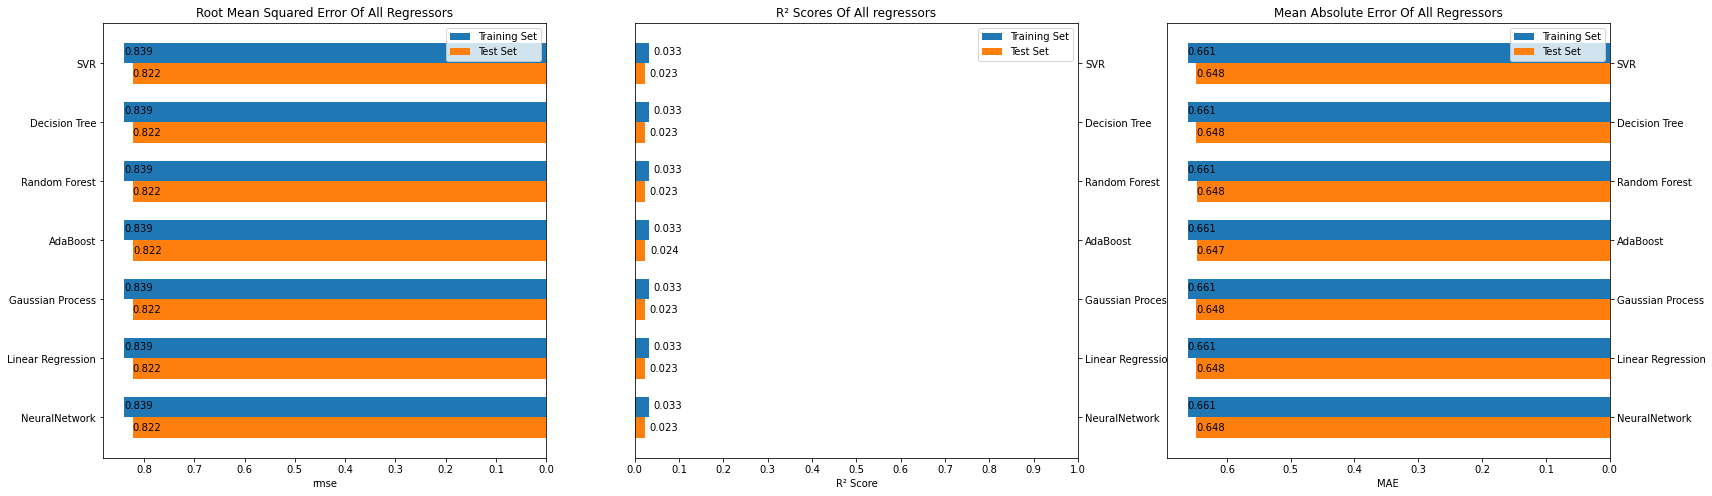

In [118]:
all_rmse = dict()
all_r2 = dict()
all_mae = dict()

# i = 0
# files=[files[i]]
 #dfs = [dfs[i]]
# dfs_test = [dfs_test[i]]



y = df_knn_imp['z_score']
X = df_knn_imp[['stunting_2cat']]



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)


# X_train, X_test = encode_labels(X_train,X_test)
# X_train, X_test = impute_value(X_train, X_test,'mean')
# X_train, X_test = normalize_data(X_train, X_test)
# X_train, X_test = dimension_reduction(X_train, X_test, n_components=15)

all_regrs, regr_names = run_all_regrs(X_train, y_train, X_test, y_test)
rmse, r2  ,mae             = plot_all(X_train, y_train, X_test, y_test, all_regrs, regr_names ) 

for k,v in rmse.items():
    if k not in all_rmse:
        all_rmse[k] = list()
    all_rmse[k].append(v)
for k,v in r2.items():
    if k not in all_r2:
        all_r2[k] = list()
    all_r2[k].append(v)
for k,v in mae.items():
    if k not in all_mae:
        all_mae[k] = list()
    all_mae[k].append(v)

In [119]:
for k,v in all_rmse.items():
    print('%s-rmse:'%k,["%.3f"%i for i in v])

SVR-rmse: ['0.822']
Decision Tree-rmse: ['0.822']
Random Forest-rmse: ['0.822']
AdaBoost-rmse: ['0.822']
Gaussian Process-rmse: ['0.822']
Linear Regression-rmse: ['0.822']
NeuralNetwork-rmse: ['0.822']


In [120]:
for k,v in all_r2.items():
    print('%s-r2:'%k,["%.3f"%i for i in v])

SVR-r2: ['0.023']
Decision Tree-r2: ['0.023']
Random Forest-r2: ['0.023']
AdaBoost-r2: ['0.024']
Gaussian Process-r2: ['0.023']
Linear Regression-r2: ['0.023']
NeuralNetwork-r2: ['0.023']


In [121]:
for k,v in all_mae.items():
    print('%s-mae:'%k,["%.3f"%i for i in v])

SVR-mae: ['0.648']
Decision Tree-mae: ['0.648']
Random Forest-mae: ['0.648']
AdaBoost-mae: ['0.647']
Gaussian Process-mae: ['0.648']
Linear Regression-mae: ['0.648']
NeuralNetwork-mae: ['0.648']


In [122]:
for k,v in all_r2.items():
    print('%s avg r2: %.2f, avg rmse: %.2f'%(k,np.mean(v),np.mean(all_rmse[k])))

SVR avg r2: 0.02, avg rmse: 0.82
Decision Tree avg r2: 0.02, avg rmse: 0.82
Random Forest avg r2: 0.02, avg rmse: 0.82
AdaBoost avg r2: 0.02, avg rmse: 0.82
Gaussian Process avg r2: 0.02, avg rmse: 0.82
Linear Regression avg r2: 0.02, avg rmse: 0.82
NeuralNetwork avg r2: 0.02, avg rmse: 0.82
